In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier

In [12]:
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()


Saving full_dataset_v3_123.xlsx to full_dataset_v3_123.xlsx


In [73]:
# Sau khi tải lên, bạn có thể đọc file Excel như sau:
import pandas as pd
df = pd.read_excel('full_dataset_v3_123.xlsx')
df.head()

,PhanNhomTuoi,TienCanTuKy,TienSuYKhoa,ChamNoi,CoLap,ChoiCamGiac_VanDong,ChoiKetHop,ChoiGiaVo,HanhViLapLai,KyNangGiaoTiepSom,ChoiLuanPhien,BatChuoc,SaiViec,PhanUngTenGoi,DiNhonChan,ChiTro,ChuYLienKet,TiepXucMat,PhanLoaiBenh,TargetBinary
0,2,0,0,1,1,3,2,0,0,1,1,3,1,3,1,3,2,2,2,1
1,3,1,0,1,1,3,3,0,1,1,0,0,2,0,0,1,1,2,1,1
2,2,0,0,1,0,3,3,2,0,1,0,3,0,1,0,2,1,1,1,1
3,1,0,0,0,0,2,1,1,1,1,0,1,0,1,1,1,2,2,1,1
4,1,0,0,1,0,2,1,1,0,1,0,1,0,1,0,1,2,2,2,1


In [40]:
# Liệt kê tên các cột
print(df.columns.tolist())
rows, cols = df.shape
print(f"Số hàng: {rows}, Số cột: {cols}")

['PhanNhomTuoi', 'TienCanTuKy', 'TienSuYKhoa', 'ChamNoi', 'CoLap', 'ChoiCamGiac_VanDong', 'ChoiKetHop', 'ChoiGiaVo', 'HanhViLapLai', 'KyNangGiaoTiepSom', 'ChoiLuanPhien', 'BatChuoc', 'SaiViec', 'PhanUngTenGoi', 'DiNhonChan', 'ChiTro', 'ChuYLienKet', 'TiepXucMat', 'PhanLoaiBenh', 'TargetBinary']
Số hàng: 593, Số cột: 20


In [71]:
df = df.drop('TargetBinary', axis=1)

In [72]:
for i, col in enumerate(df.columns):
    print(f"Vị trí {i}: {col}")

Vị trí 0: PhanNhomTuoi
Vị trí 1: TienCanTuKy
Vị trí 2: TienSuYKhoa
Vị trí 3: ChamNoi
Vị trí 4: CoLap
Vị trí 5: ChoiCamGiac_VanDong
Vị trí 6: ChoiKetHop
Vị trí 7: ChoiGiaVo
Vị trí 8: HanhViLapLai
Vị trí 9: KyNangGiaoTiepSom
Vị trí 10: ChoiLuanPhien
Vị trí 11: BatChuoc
Vị trí 12: SaiViec
Vị trí 13: PhanUngTenGoi
Vị trí 14: DiNhonChan
Vị trí 15: ChiTro
Vị trí 16: ChuYLienKet
Vị trí 17: TiepXucMat
Vị trí 18: PhanLoaiBenh


In [53]:
X = df.iloc[:, 0:17].values
y = df.iloc[:, 18].values

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print(f"Kích thước tập train: {len(X_train)} dòng")
print(f"Kích thước tập test: {len(X_test)} dòng")

Kích thước tập train: 474 dòng
Kích thước tập test: 119 dòng


In [55]:
xgb_train = xgb.DMatrix(X_train, y_train, enable_categorical=True)
xgb_test = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [58]:
# Giả sử bạn đã có X_train, y_train
# Bước 1: Chuẩn hóa nhãn về [0, num_class - 1]
y_train = y_train - 1  # nếu y ban đầu là [1, 2, 3]

# Bước 2: Tạo DMatrix cho XGBoost
xgb_train = xgb.DMatrix(X_train, label=y_train)

# Bước 3: Khai báo tham số mô hình
params = {
    'objective': 'multi:softmax',
    'num_class': 3,
    'max_depth': 3,
    'learning_rate': 0.1,
}

# Bước 4: Huấn luyện mô hình
n = 50
model = xgb.train(params=params, dtrain=xgb_train, num_boost_round=n)

In [59]:
print("Giá trị mã hóa y_pred:", np.unique(y_pred))
print("LabelEncoder classes:", le.classes_)


Giá trị mã hóa y_pred: [0 1 2]
LabelEncoder classes: [1 2 3]


In [60]:
from sklearn.metrics import classification_report, accuracy_score
# 2. Mã hóa nhãn target (1–3) → 0–2
le = LabelEncoder()
y = le.fit_transform(df['PhanLoaiBenh'])  # y_encoded

# 3. Ánh xạ tên class ngắn gọn
short_labels_map = {
    1: 'YES',
    2: 'THINKING',
    3: 'NO'
}
class_names = [short_labels_map[int(label)] for label in le.classes_]
# Dự đoán
y_pred = model.predict(xgb_test).astype(int)

y_test = y_test - 1

# In báo cáo phân loại
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))

# In độ chính xác
print("Accuracy:", accuracy_score(y_test, y_pred))



Classification Report:

              precision    recall  f1-score   support

         YES       0.78      0.88      0.82        64
    THINKING       0.80      0.64      0.71        44
          NO       0.75      0.82      0.78        11

    accuracy                           0.78       119
   macro avg       0.78      0.78      0.77       119
weighted avg       0.78      0.78      0.78       119

Accuracy: 0.7815126050420168


In [61]:
print("y_test unique:", np.unique(y_test))
print("y_pred unique:", np.unique(y_pred))
print("class_names:", class_names)


y_test unique: [0 1 2]
y_pred unique: [0 1 2]
class_names: ['YES', 'THINKING', 'NO']


# CẢI TIẾN MÔ HÌNH

# 2. Tối ưu siêu tham số (hyperparameter tuning)

In [91]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid = {
    'max_depth': [3, 5, 7, 9, 15],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 150]
}

clf = GridSearchCV(
    XGBClassifier(objective='multi:softmax', num_class=3),
    param_grid,
    scoring='accuracy',
    cv=3
)
clf.fit(X_train, y_train)
print("Best params:", clf.best_params_)


Best params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


In [93]:
# Mã hóa nhãn gốc
le = LabelEncoder()
y = le.fit_transform(df['PhanLoaiBenh'])  # y = [0,1,2] cho các lớp

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Không cần trừ y_train! Giữ nguyên
xgb_train = xgb.DMatrix(X_train, label=y_train)
xgb_test = xgb.DMatrix(X_test)

params = {
    'objective': 'multi:softmax',
    'num_class': len(le.classes_),
    'max_depth': 9,
    'learning_rate': 0.01,
}

model = xgb.train(params=params, dtrain=xgb_train, num_boost_round=100)

# Dự đoán
y_pred = model.predict(xgb_test).astype(int)

# Đánh giá
class_names = [str(label) for label in le.classes_]
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))
print("Accuracy:", accuracy_score(y_test, y_pred))



Classification Report:

              precision    recall  f1-score   support

           1       0.77      0.84      0.81        64
           2       0.74      0.64      0.68        44
           3       1.00      1.00      1.00        11

    accuracy                           0.78       119
   macro avg       0.84      0.83      0.83       119
weighted avg       0.78      0.78      0.78       119

Accuracy: 0.7815126050420168


## 1. SMOTE CẢI TIẾN CÂN BẰNG DỮ LIỆU

SMOTE (Synthetic Minority Over-sampling Technique) là một kỹ thuật tăng cường dữ liệu (data augmentation) cho các lớp thiểu số (minority class) trong các bài toán mất cân bằng lớp.

In [62]:
pip install imbalanced-learn

In [63]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [90]:
# 1. Chuẩn bị dữ liệu
X = df.drop('PhanLoaiBenh', axis=1).values
y_raw = df['PhanLoaiBenh'].values

# 2. Mã hóa nhãn bằng LabelEncoder (không -1 thủ công!)
le = LabelEncoder()
y = le.fit_transform(y_raw)  # nhãn sẽ là 0, 1, 2 tương ứng với YES/THINKING/NO

# 3. Tách train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. SMOTE cho train
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 5. Huấn luyện XGBoost
xgb_train = xgb.DMatrix(X_resampled, label=y_resampled)
params = {
    'objective': 'multi:softmax',
    'num_class': len(le.classes_),  # an toàn và tự động
    'max_depth': 9,
    'learning_rate': 0.01,
}
model = xgb.train(params=params, dtrain=xgb_train, num_boost_round=100)

# 6. Dự đoán
xgb_test = xgb.DMatrix(X_test)
y_pred = model.predict(xgb_test).astype(int)

# 7. Hiển thị kết quả với nhãn gốc
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred)

target_names = [str(cls) for cls in le.classes_]


print("\nClassification Report:\n")
print(classification_report(y_test_labels, y_pred_labels, target_names=target_names))
print("Accuracy:", accuracy_score(y_test_labels, y_pred_labels))



Classification Report:

              precision    recall  f1-score   support

           1       0.84      0.80      0.82        64
           2       0.72      0.77      0.75        44
           3       1.00      1.00      1.00        11

    accuracy                           0.81       119
   macro avg       0.85      0.86      0.85       119
weighted avg       0.81      0.81      0.81       119

Accuracy: 0.8067226890756303


In [76]:
print("unique y_test:", np.unique(y_test))
print("unique y_pred:", np.unique(y_pred))
print("class_names:", class_names)


unique y_test: [0 1 2]
unique y_pred: [0 1 2]
class_names: ['YES', 'THINKING', 'NO']


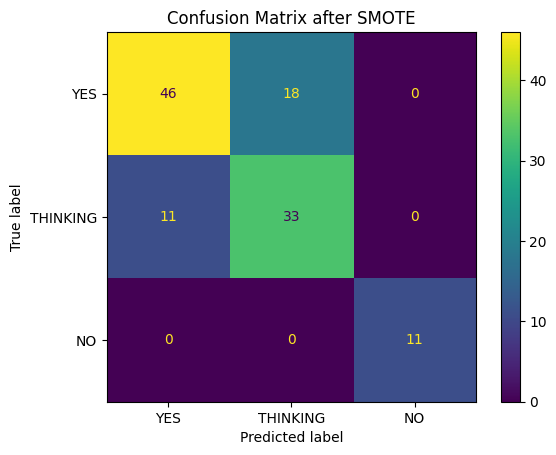

In [77]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=class_names)
plt.title("Confusion Matrix after SMOTE")
plt.show()


# KẾT LUẬN

Đánh giá: Mô hình hoạt động khá tốt với lớp "NO" (chính xác 100%)

Lỗi nhầm nhiều nhất giữa "YES" và "THINKING"

Điều này có thể là vì hai lớp này có đặc điểm đầu vào gần giống nhau

Đề xuất: Thêm đặc trưng (feature) để phân biệt rõ hơn giữa "YES" và "THINKING"

Thử mô hình khác (Random Forest, LightGBM) để so sánh

Dùng softprob để lấy xác suất, từ đó gán nhãn theo ngưỡng linh hoạt thay vì argmax